# Humidity

In [1]:
import matplotlib.pyplot as plt
from typhon import plots

import konrad


plots.styles.use('typhon')

## Fixed relative humidity

By default, konrad will preserve the relative humidity in the atmospheric column.
Internally, this is done by the `FixedRH` component, which will use a given function that prescribes the vertical distribution of relative humidity.
There are various pre-defined functions in `konrad.humidity`, for example, a vertically uniform humidity distribution.

In [2]:
humidity_model = konrad.humidity.FixedRH(
    rh_func=konrad.humidity.VerticallyUniform(0.7),
)

Next, we can compile and run our RCE simulation

In [3]:
plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 128)
atmosphere = konrad.atmosphere.Atmosphere(phlev)

rce = konrad.RCE(
    atmosphere,
    surface=konrad.surface.FixedTemperature(temperature=288.),  # Run with a fixed surface temperature.
    humidity=humidity_model,  # Here, we pass the humidity component that we just created
    timestep='12h',  # Set timestep in model time.
    max_duration='150d',  # Set maximum runtime.
)
rce.run()  # Start the simulation.

The vertical humidity distribution is one of the largest controling factors for the net radiative heating $Q_r$ in the atmosphere.
$Q_r$ is a decisive quantity in climate science as it destabilizies the atmosphere, which is a premise for convection of air masses.

Text(0.5, 0, '$Q_\\mathrm{r}$ / (K/day)')

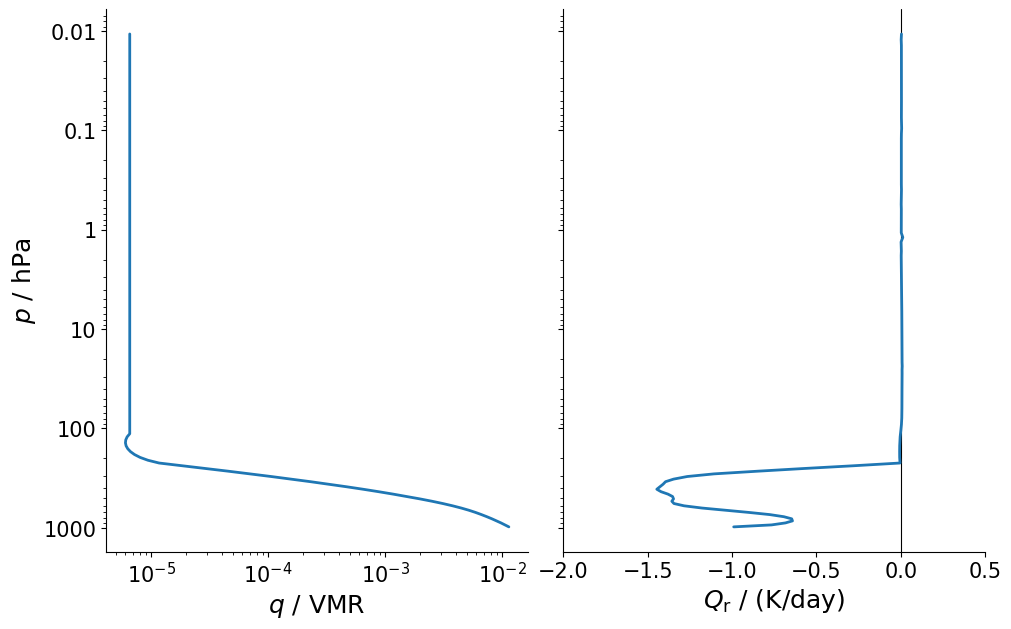

In [4]:
fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True)
plots.profile_p_log(atmosphere['plev'], atmosphere['H2O'][-1, :], ax=ax0)
ax0.set_xlabel(r"$q$ / VMR")
ax0.set_xscale("log")
ax0.set_ylabel("$p$ / hPa")

ax1.axvline(0, color="k", linewidth=0.8)
plots.profile_p_log(atmosphere['plev'], rce.radiation["net_htngrt"][-1, :], ax=ax1)
ax1.set_xlim(-2, 0.5)
ax1.set_xlabel(r"$Q_\mathrm{r}$ / (K/day)")

## Fixed absolute humidity

There is also a special class that will keep the absolute amount of water vapor fixed. This can be used to turn off the water-vapor feedback in a simulation, or, to run a simulation without any water vapor at all.

Text(0.5, 0, '$Q_\\mathrm{r}$ / (K/day)')

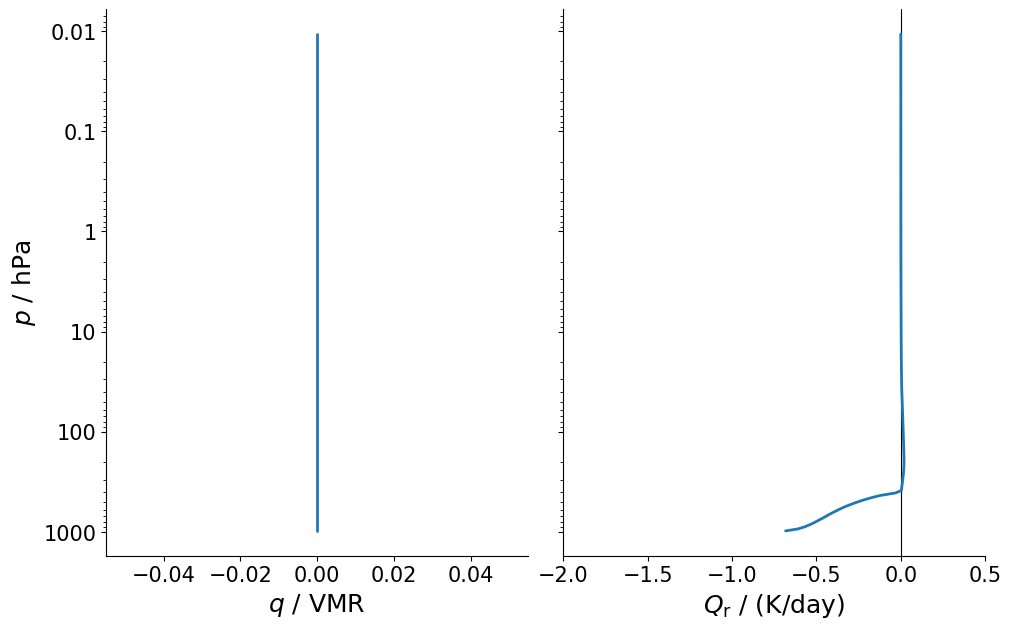

In [5]:
plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 128)
atmosphere = konrad.atmosphere.Atmosphere(phlev)

atmosphere["H2O"][:] = 0.0  # Remove all water-vapor from the atmospheric column
humidity_model = konrad.humidity.FixedVMR()  # Preserve the absolute humidity

rce = konrad.RCE(
    atmosphere,
    surface=konrad.surface.FixedTemperature(temperature=288.),  # Run with a fixed surface temperature.
    humidity=humidity_model,  # Here, we pass the humidity component that we just created
    timestep='12h',  # Set timestep in model time.
    max_duration='100d',  # Set maximum runtime.
)
rce.run()  # Start the simulation.

fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True)
plots.profile_p_log(atmosphere['plev'], atmosphere['H2O'][-1, :], ax=ax0)
ax0.set_xlabel(r"$q$ / VMR")
ax0.set_ylabel("$p$ / hPa")

ax1.axvline(0, color="k", linewidth=0.8)
plots.profile_p_log(atmosphere['plev'], rce.radiation["net_htngrt"][-1, :], ax=ax1)
ax1.set_xlim(-2, 0.5)
ax1.set_xlabel(r"$Q_\mathrm{r}$ / (K/day)")